In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
btc_raw_df = pd.read_parquet("/home/giujorge/Documents/Projets/bot_strategies/data/raw/BTC-USDT.csv.parquet.gzip")
btc_raw_df

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,
2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.77518300,1502942459999,7564.90685084,3,0.07518300,320.39085084,7960.54017996
2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.00000000,1502942519999,0.00000000,0,0.00000000,0.00000000,7960.45262989
2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.26107400,1502942579999,1117.54292144,2,0.26107400,1117.54292144,7960.37529526
2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.01200800,1502942639999,51.17185184,3,0.01200800,51.17185184,7960.37529526
2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.14079600,1502942699999,599.99933808,1,0.14079600,599.99933808,7960.37529526
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-18 14:09:00,39423.05,39423.06,39377.05,39385.62,22.37338000,1650290999999,881512.83100580,758,6.59638000,259885.09290650,0
2022-04-18 14:10:00,39385.61,39401.54,39370.24,39400.00,29.43069000,1650291059999,1159033.25545720,788,14.55146000,573044.31840130,0
2022-04-18 14:11:00,39400.00,39444.80,39399.83,39442.55,25.65637000,1650291119999,1011437.53518520,720,13.72377000,541044.94403500,0


In [3]:
df =  btc_raw_df[['open', 'high', 'low', 'close', 'volume']]
df

,open,high,low,close,volume
timestamp,,,,,
2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.77518300
2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.00000000
2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.26107400
2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.01200800
2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.14079600
...,...,...,...,...,...
2022-04-18 14:09:00,39423.05,39423.06,39377.05,39385.62,22.37338000
2022-04-18 14:10:00,39385.61,39401.54,39370.24,39400.00,29.43069000
2022-04-18 14:11:00,39400.00,39444.80,39399.83,39442.55,25.65637000


In [38]:
df['rollhigh'] = df.high.rolling(25).max()

In [39]:
df['rolllow'] = df.high.rolling(25).min()

In [40]:
df['mid'] = (df.rollhigh + df.rolllow) / 2

In [53]:
df['highapproch'] = np.where(df.close > df.rollhigh * 0.996, 1, 0)

In [54]:
df['close_a_mid'] = np.where(df.close > df.mid, 1, 0)

In [55]:
df['midcross'] = df.close_a_mid.diff() == 1

In [56]:
df

,open,high,low,close,volume,rollhigh,rolllow,mid,highapproch,close_a_mid,midcross
timestamp,,,,,,,,,,,
2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.77518300,NaN,NaN,NaN,0,0,False
2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.00000000,NaN,NaN,NaN,0,0,False
2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.26107400,NaN,NaN,NaN,0,0,False
2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.01200800,NaN,NaN,NaN,0,0,False
2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.14079600,NaN,NaN,NaN,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-18 14:09:00,39423.05,39423.06,39377.05,39385.62,22.37338000,39459.29,39324.2,39391.745,1,0,False
2022-04-18 14:10:00,39385.61,39401.54,39370.24,39400.00,29.43069000,39459.29,39324.2,39391.745,1,1,True
2022-04-18 14:11:00,39400.00,39444.80,39399.83,39442.55,25.65637000,39459.29,39324.2,39391.745,1,1,False


In [57]:
in_position = False
buydates, selldates = [], []

for i in range(len(df)):
    if not in_position:
        if df.iloc[i].midcross:
            buydates.append(df.iloc[i+1].name)
            in_position = True
        if in_position:
            if df.iloc[i].highapproch:
                selldates.append(df.iloc[i+1].name)
                in_position = False

ValueError: x and y must be the same size

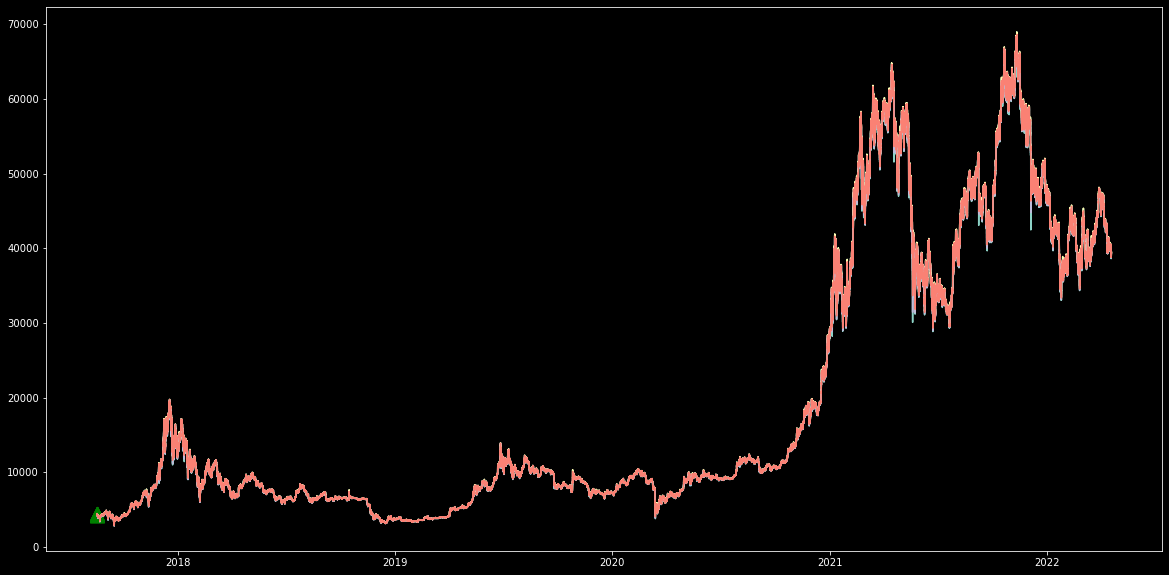

In [58]:
plt.style.use('dark_background')
plt.figure(figsize=(20,10))
plt.plot(df[['close', 'rollhigh', 'rolllow', "mid"]])
plt.scatter(buydates, df.loc[buydates].open, marker='^', color='g', s=200)
plt.scatter(buydates, df.loc[selldates].open, marker='v', color='r', s=200)

In [59]:
tradedf = pd.DataFrame([buydates, selldates, df.loc[buydates].open, df.loc[selldates].open]).T

In [60]:
tradedf.columns = ['buydates', 'selldates', 'buyprices', 'sellprices']

In [61]:
tradedf.dropna(inplace=True)

In [62]:
tradedf['profit_rel'] = (tradedf.sellprices - tradedf.buyprices) / tradedf.buyprices

In [63]:
tradedf['net_profit'] = tradedf.profit_rel - 0.0015 #binance fees

In [64]:
(tradedf.net_profit +1).prod()

0.9545312373846445

In [ ]:
modifier les parametres rolling et 0.996 pour opti